In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the data
data=pd.read_csv('suicide data')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
#Finding the shape
data.shape

(27820, 12)

In [4]:
#Checking if there are any null values
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
##As you can see, most of the 'HDIForYear' column is empty and 'country-year' does not play much important role inthe data . That's why we would delete both the columns 
data = data.drop(['country-year','HDI for year'],axis=1)
print(data.shape)
data.head()

(27820, 10)


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [6]:
#maximum and minimum number of suicides in the data
print(max(data.suicides_no))
print(min(data.suicides_no))

22338
0


In [19]:
#male data in our given data
male=data[data['sex'] == 'male']
male.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,"2,156,624,900",796,G.I. Generation


In [22]:
#female data in our given data
female=data[data['sex']=='female']
female.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
5,Albania,1987,female,75+ years,1,35600,2.81,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,"2,156,624,900",796,Boomers
9,Albania,1987,female,5-14 years,0,311000,0.00,"2,156,624,900",796,Generation X


In [29]:
#no.of male suicides in the given data
male_suicides=male.suicides_no.sum()
male_suicides

5188910

In [31]:
#no.of female suicides in the given data
female_suicides=female.suicides_no.sum()
female_suicides

1559510

In [32]:
#Short description of the data of certain columns
data[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


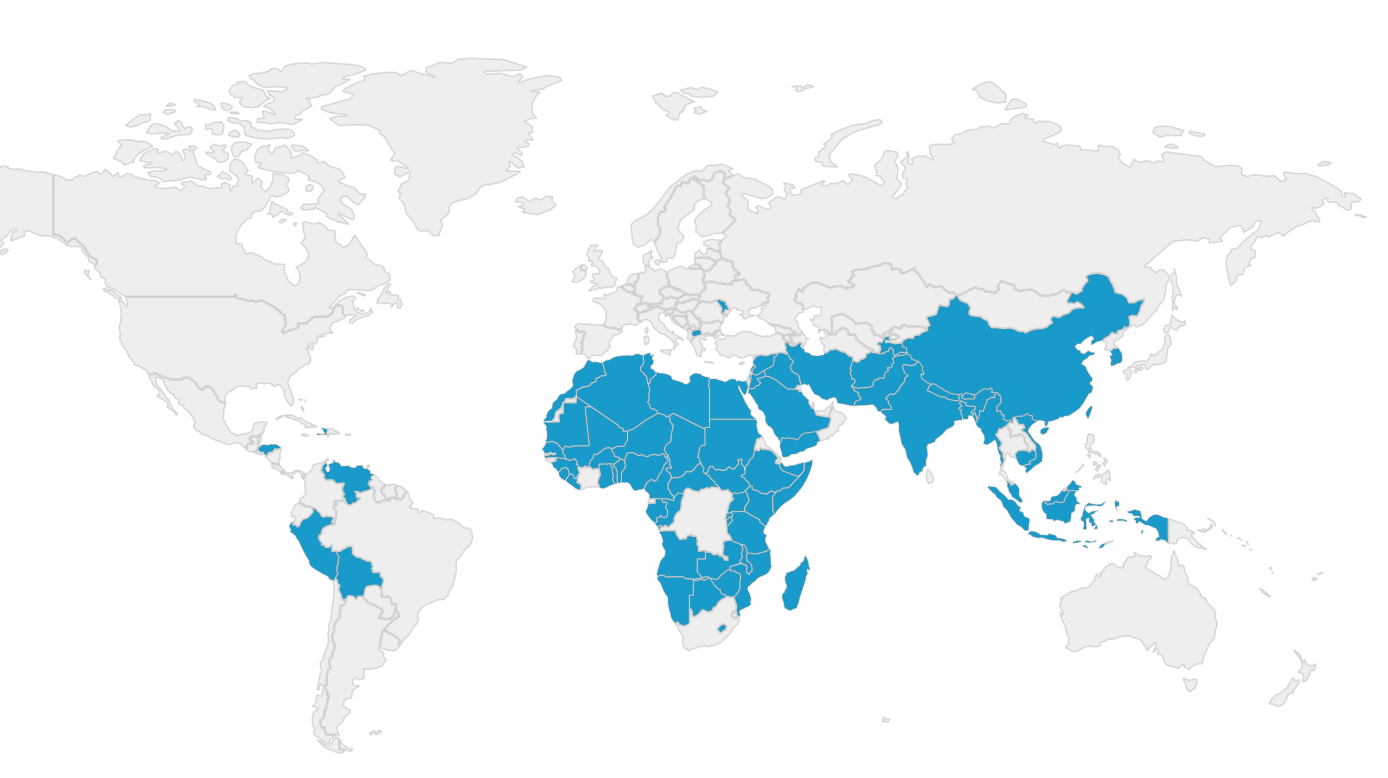

In [33]:
#Geographical presentation of Data.
from IPython.display import Image
Image('__results___8_0.png')

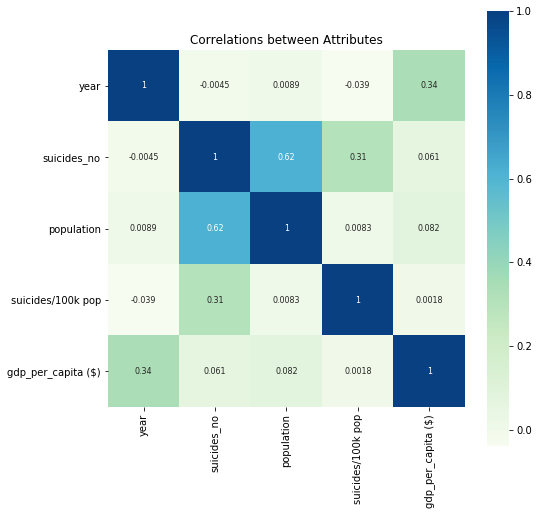

In [34]:
#finding the correlation between features using heatmap
fig=plt.subplots(figsize=(8,8))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

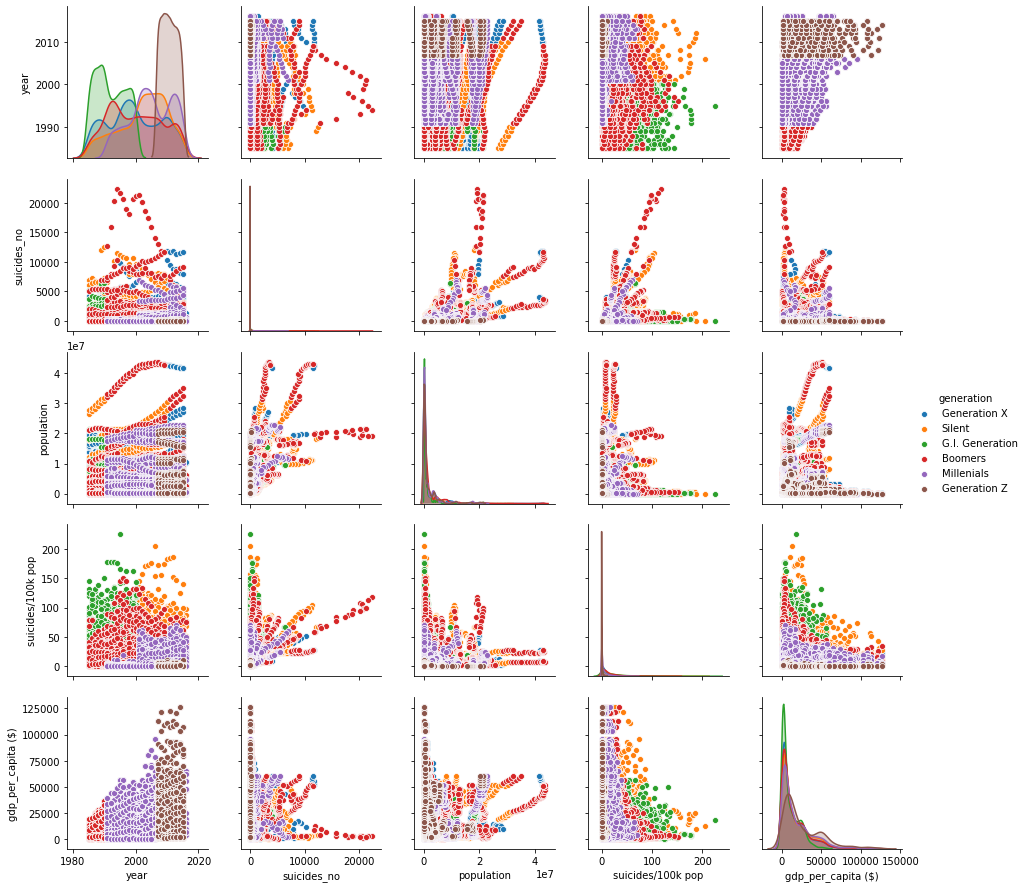

In [35]:
sns.pairplot(data, hue="generation")
plt.show()

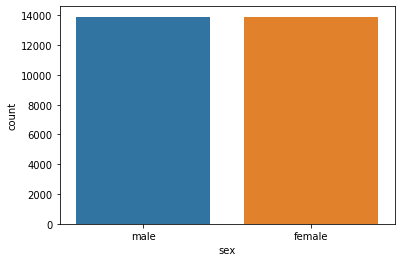

In [36]:
sns.countplot(data.sex)
plt.show()

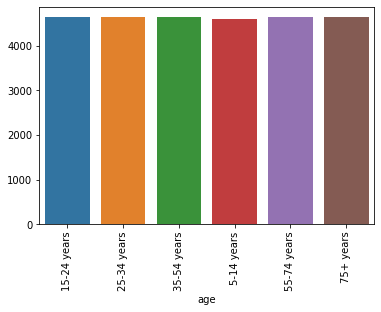

In [37]:
sns.barplot(x=data.groupby('age')['sex'].count().index,y=data.groupby('age')['sex'].count().values)
plt.xticks(rotation=90)
plt.show()

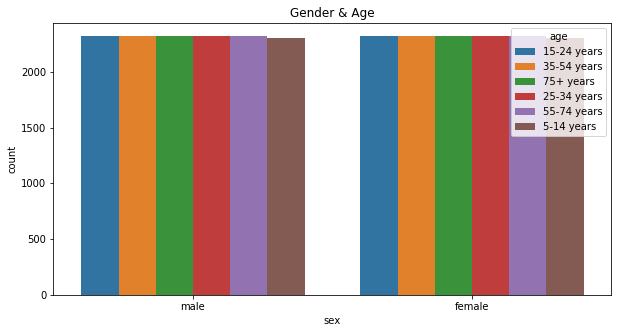

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data.sex,hue=data.age)
plt.title('Gender & Age')
plt.show()
##there has been an even gender & hue age distribution.

In [39]:
data.groupby('age')['sex'].count()

age
15-24 years    4642
25-34 years    4642
35-54 years    4642
5-14 years     4610
55-74 years    4642
75+ years      4642
Name: sex, dtype: int64

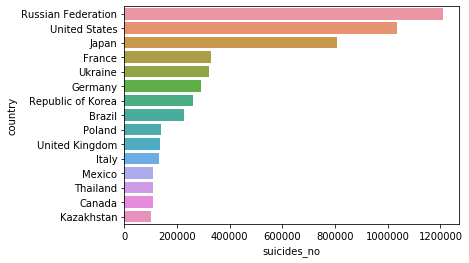

In [40]:
suicides_no=[]
for country in data.country.unique():
    suicides_no.append(sum(data[data['country']==country].suicides_no))   
suicides_no=pd.DataFrame(suicides_no,columns=['suicides_no'])
country=pd.DataFrame(data.country.unique(),columns=['country'])
data_suicide_countr=pd.concat([suicides_no,country],axis=1)
data_suicide_countr=data_suicide_countr.sort_values(by='suicides_no',ascending=False)
sns.barplot(y=data_suicide_countr.country[:15],x=data_suicide_countr.suicides_no[:15])
plt.show()

In [41]:
grouop_data=data.groupby(['age','sex'])['suicides_no'].sum().unstack()
grouop_data=grouop_data.reset_index().melt(id_vars='age')
grouop_data_female=grouop_data.iloc[:6,:]
grouop_data_male=grouop_data.iloc[6:,:]
grouop_data_female

,age,sex,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984


In [42]:
grouop_data_male

,age,sex,value
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267
10,55-74 years,male,1228407
11,75+ years,male,431134


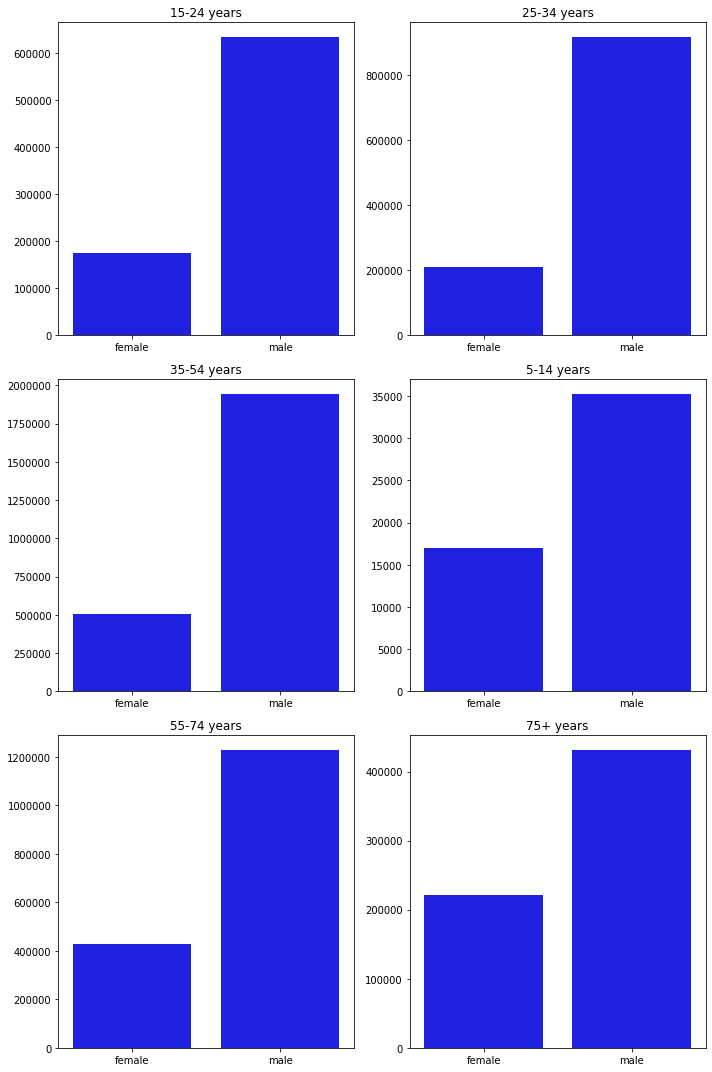

In [44]:
#Graphical analysis was performed for all age rates for suicide rates.
female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()    
    sns.barplot(x=['female','male'],y=[female_[i],male_[i]],color='blue')
    plt.tight_layout()
    fig.set_size_inches(10, 15)
plt.show()

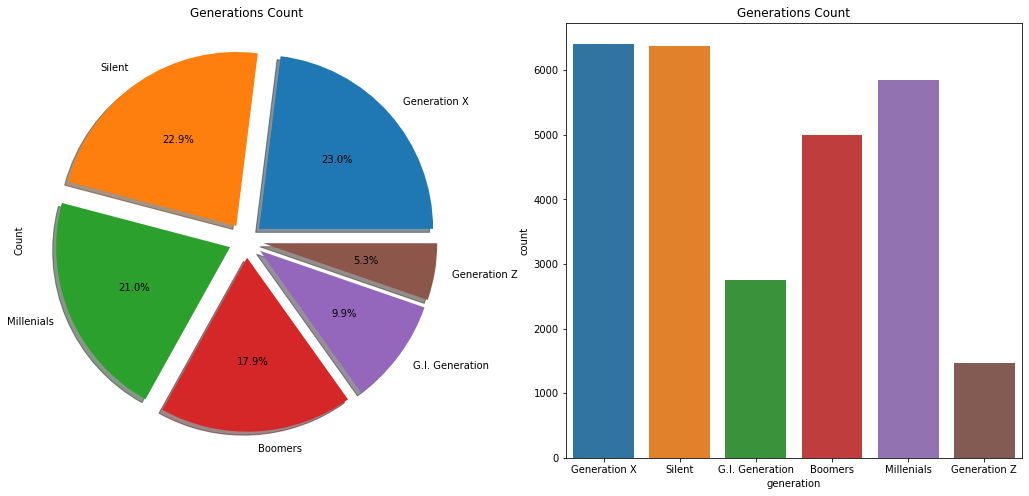

In [45]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Generations Count')
ax[0].set_ylabel('Count')
sns.countplot('generation',data=data,ax=ax[1])
ax[1].set_title('Generations Count')
plt.show()

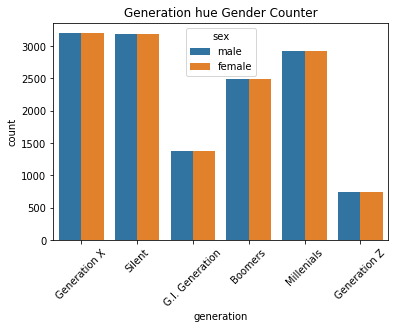

In [46]:
sns.countplot(data.generation,hue=data.sex)
plt.title('Generation hue Gender Counter')
plt.xticks(rotation=45)
plt.show()

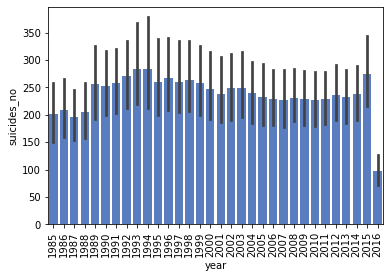

In [47]:
sns.set_color_codes("muted")
sns.barplot(x="year", y="suicides_no", data=data,
            label="Year Suicides", color="b")
plt.xticks(rotation=90)
plt.show()

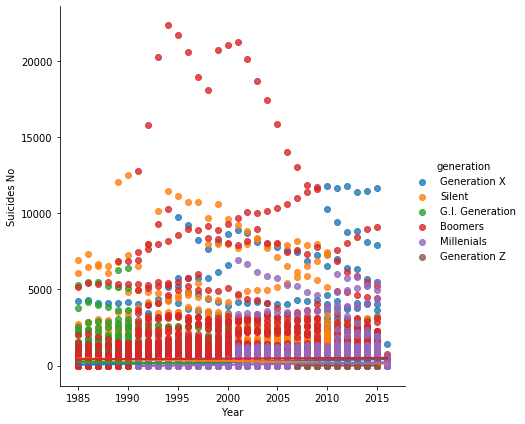

In [48]:
g = sns.lmplot(x="year", y="suicides_no", hue="generation",
               truncate=True, height=6, data=data)
g.set_axis_labels("Year", "Suicides No")
plt.show()

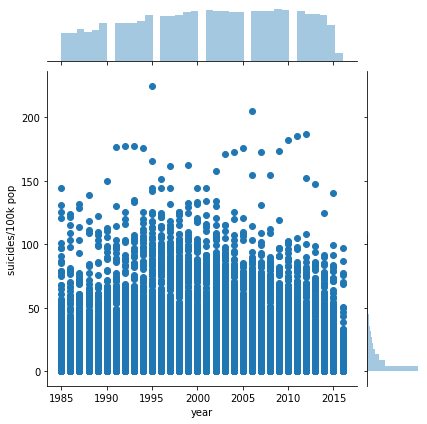

In [49]:
fig=sns.jointplot(y='suicides/100k pop',x='year',data=data)
plt.show()

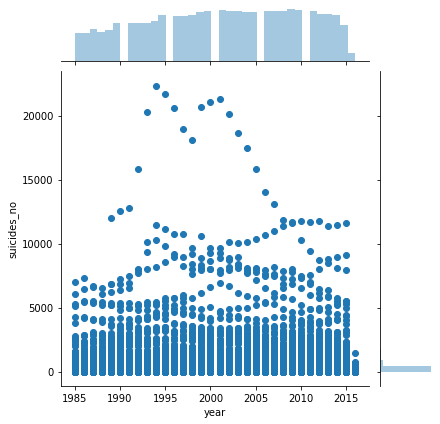

In [50]:
fig=sns.jointplot(y='suicides_no',x='year',data=data)
plt.show()

In [51]:
data=data.rename(columns={' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney'})

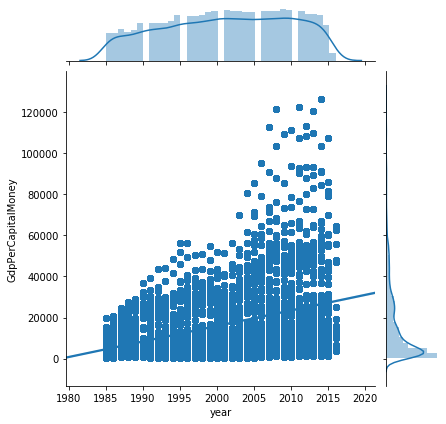

In [52]:
sns.jointplot("year", "GdpPerCapitalMoney", data=data, kind="reg")
plt.show()

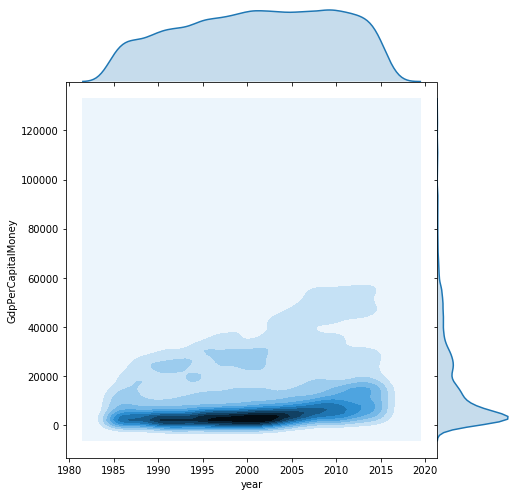

In [53]:
g = sns.jointplot(data.year,data.GdpPerCapitalMoney, kind="kde", height=7, space=0)
plt.show()

C:\Users\Amani\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


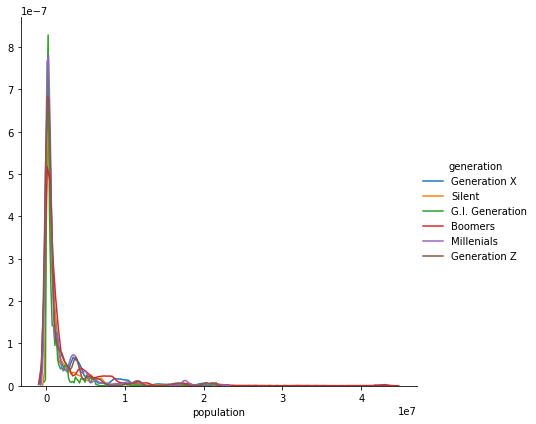

In [54]:
sns.FacetGrid(data, hue="generation", size=6).map(sns.kdeplot, "population").add_legend()
plt.ioff() 
plt.show()